In [1]:
import pygal
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
from scipy.stats import chisquare
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("OnlineNewsPopularity.csv")

In [7]:
df.shape

(39644, 61)

In [10]:
df.columns = [x.strip() for x in df.columns]

In [18]:
df["shares"].describe(percentiles = [x/10 for x in range(10)] + [0.01, 0.05, 0.95, 0.99])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
0%            1.000000
1%          381.000000
5%          584.000000
10%         708.000000
20%         870.600000
30%        1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
80%        3400.000000
90%        6200.000000
95%       10800.000000
99%       31657.000000
max      843300.000000
Name: shares, dtype: float64

In [21]:
df = df[(df["shares"] <= 31657) & (df["shares"] >= 381)]

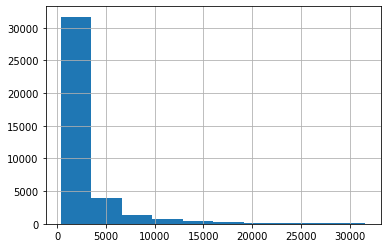

In [22]:
df["shares"].hist()

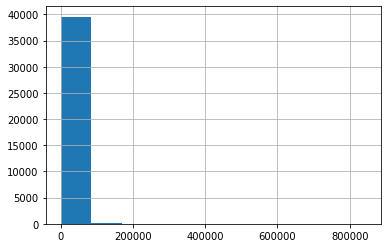

In [15]:
df["shares"].hist()

In [41]:
def plot_histogram(data):
    freq, bins = np.histogram(data)
    hist = list(zip(freq, bins, bins[1:]))
    hist_plot = pygal.Histogram()
    hist_plot.add("Distribución", hist)
    return hist_plot

In [ ]:
ls_cont = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
           'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
           'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
           'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
           'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
           'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
           'abs_title_subjectivity', 'abs_title_sentiment_polarity']
ls_disc = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday',
           'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
           'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

In [43]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [32]:
freq, bins = np.histogram(df["shares"])

In [33]:
hist = list(zip(freq, bins, bins[1:]))

In [34]:
hist_plot = pygal.Histogram()

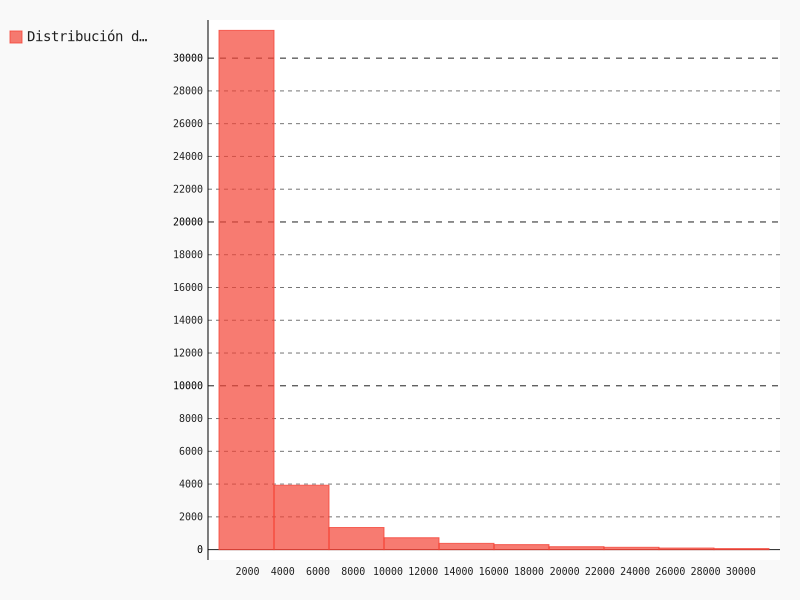

In [35]:
hist_plot.add("Distribución de shares", hist)

In [36]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
val = pd.read_csv("val.csv")

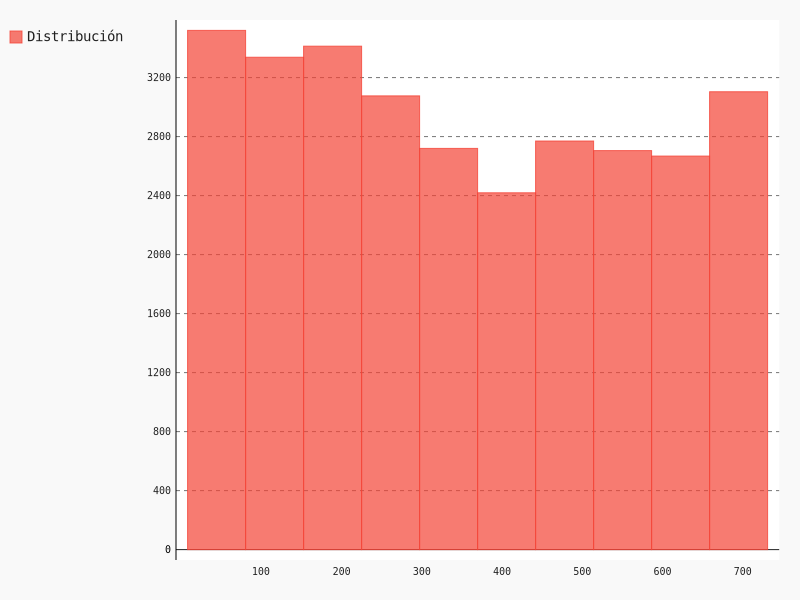

In [49]:
plot_histogram(train["timedelta"])

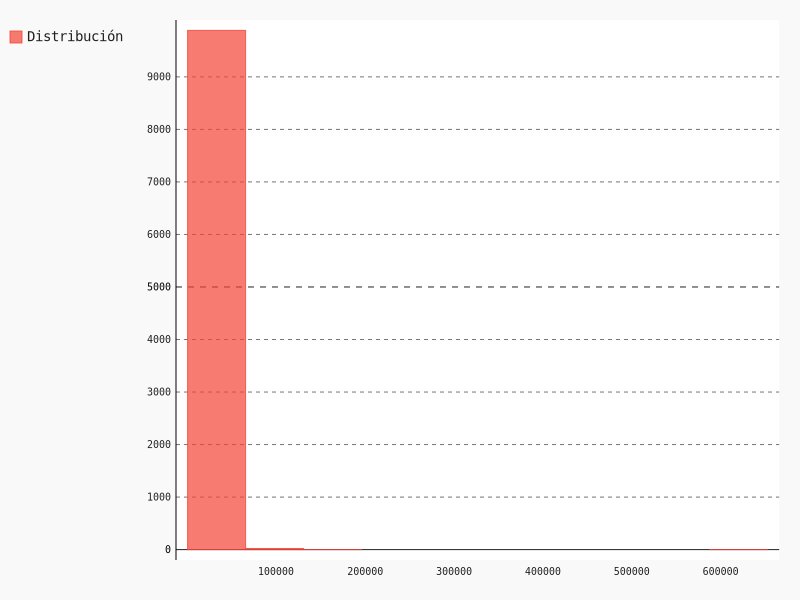

In [56]:
plot_histogram(test["shares"])

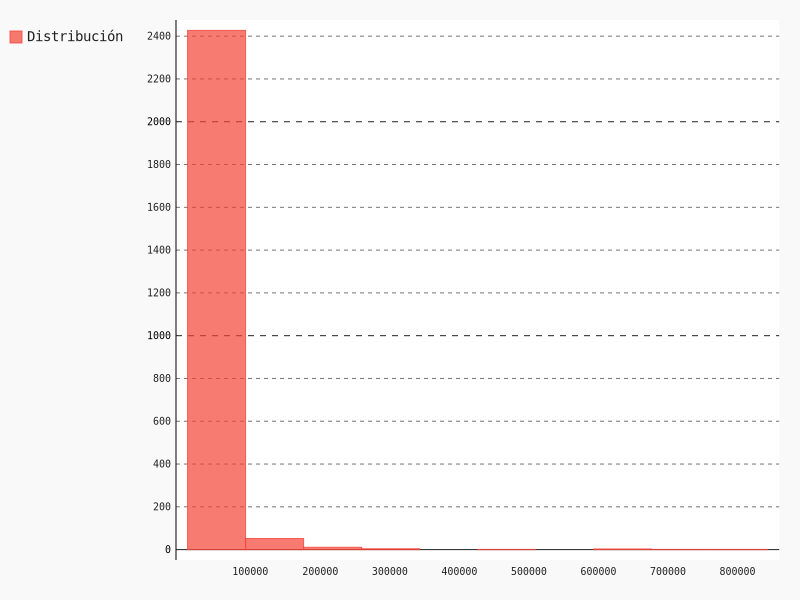

In [57]:
plot_histogram(val["shares"])

In [54]:
ks_2samp(train["shares"], test["shares"])

Ks_2sampResult(statistic=0.008609961995089649, pvalue=0.638348395076077)

In [55]:
ks_2samp(train["shares"], val["shares"])

Ks_2sampResult(statistic=0.936501530286214, pvalue=0.0)

In [81]:
df["is_weekend"].value_counts()

0.0    33751
1.0     5102
Name: is_weekend, dtype: int64

In [78]:
train["is_weekend"].value_counts()

0.0    25848
1.0     3885
Name: is_weekend, dtype: int64

In [79]:
test["is_weekend"].value_counts()

0.0    8606
1.0    1305
Name: is_weekend, dtype: int64

In [77]:
test["is_weekend"].value_counts()

0.0    8606
1.0    1305
Name: is_weekend, dtype: int64

In [73]:
val["is_weekend"].value_counts(True)

0.0    0.8412
1.0    0.1588
Name: is_weekend, dtype: float64

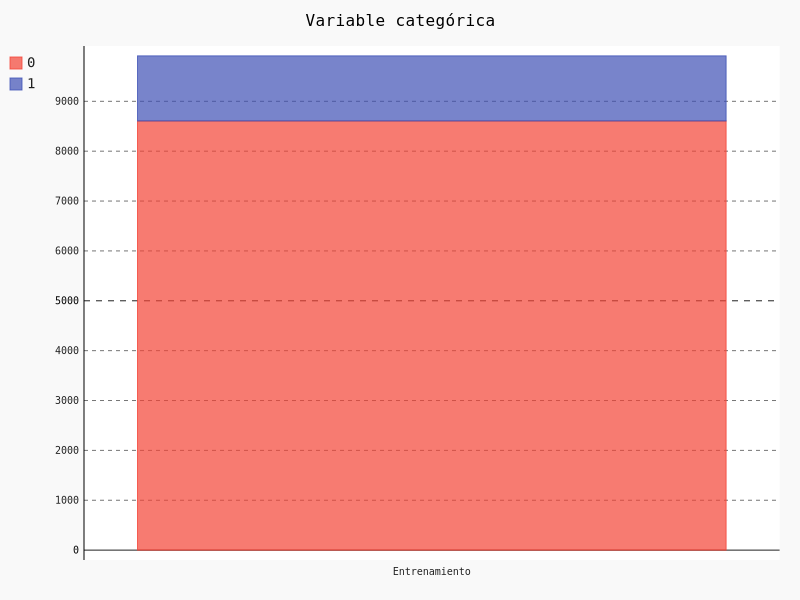

In [69]:
line_chart = pygal.StackedBar()
line_chart.title = u'Variable categórica'
line_chart.x_labels = ["Entrenamiento"]
line_chart.add('0', [8606])
line_chart.add('1', [1305])
line_chart

In [72]:
chisquare([100, 20], [100, 20])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [82]:
chisquare([25848, 3885], [33751, 5102])

Power_divergenceResult(statistic=2140.830831993816, pvalue=0.0)